In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
Data = {'x':[25,34,22,27,33,31,23,33,67,54,50,60,70,80,90,47,49,57,67,77,87,97,51],
       'y':[75,38,20,26,44,11,63,73,66,54,20,63,71,80,40,26,49,63,61,71,80,92,52]}

In [3]:
df=pd.DataFrame(Data, columns=['x','y'])
kmeans=KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
kmeans.cluster_centers_

array([[34.85714286, 26.42857143],
       [79.375     , 70.125     ],
       [44.        , 61.5       ]])

In [5]:
cluster = kmeans.labels_
df['Cluster']=cluster

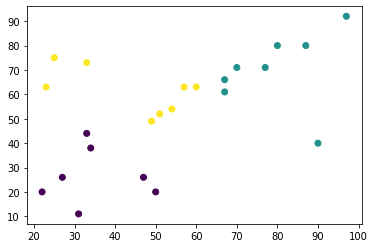

In [6]:
plt.scatter(df['x'], df['y'], c=df['Cluster'])
plt.show()

In [7]:
kmeans.predict([[40,39]])

array([0])

# Implementation on movie matadata

In [8]:
df=pd.read_csv('movie_metadata1.csv')

In [9]:
df.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000


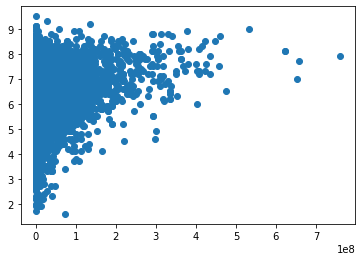

In [10]:
subset=df[['gross', 'imdb_score']]
plt.plot(subset['gross'], subset['imdb_score'], 'o')

In [11]:
res=[]
for each in range(2,10):
    kmeans=KMeans(n_clusters=each)
    kmeans.fit(subset)
    groups=kmeans.labels_
    score=silhouette_score(subset,groups)
    res.append((each,score))

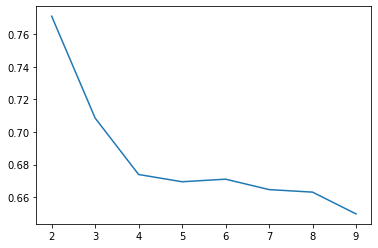

In [12]:
#Elbow plot
plt.plot(list(zip(*res))[0], list(zip(*res))[1])

In [13]:
res
# silhoutte score shud be between -1 to 1 and its max at 2 clusters.

[(2, 0.7711381589851375),
 (3, 0.7085553078353303),
 (4, 0.6738880103632809),
 (5, 0.6694253258207956),
 (6, 0.671017670522676),
 (7, 0.6646157312511041),
 (8, 0.6630505999151484),
 (9, 0.6496654822884677)]

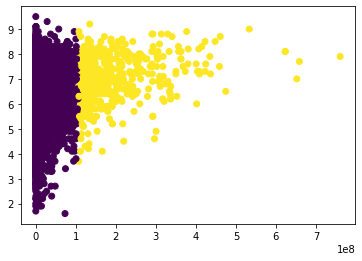

In [14]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(subset)
groups=kmeans.labels_
plt.scatter(df['gross'],df['imdb_score'],c=groups)
plt.show()

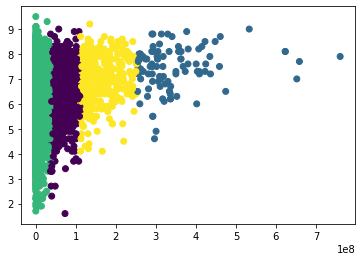

In [15]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(subset)
groups=kmeans.labels_
plt.scatter(df['gross'],df['imdb_score'],c=groups)
plt.show()

In [16]:
subset['Label']=groups

C:\Users\bpeddi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
subset.head(5)

,gross,imdb_score,Label
0,760505847,7.9,1
1,309404152,7.1,1
2,200074175,6.8,3
3,448130642,8.5,1
4,49,7.1,2


In [18]:
# Hierarchical Clustering

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
%matplotlib  inline
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize']=(5,5)
plt.style.use('ggplot')

In [24]:
data=pd.read_csv('movie_metadata1.csv')
f1=data['budget'].values
f2=data['gross'].values

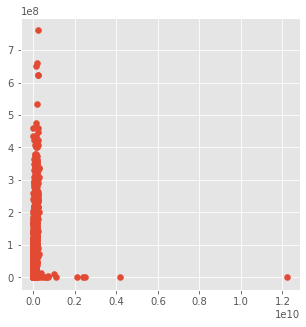

In [25]:
plt.scatter(f1,f2)

In [32]:
fb=f1[0:10]
fg=f2[0:10]
X=np.array(list(zip(fb, fg)))

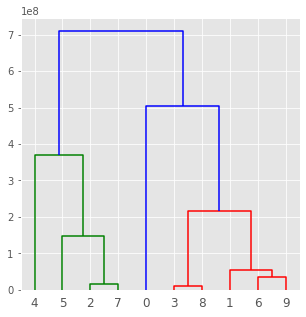

In [33]:
Z=linkage(X, 'ward')
dn=dendrogram(Z)
plt.show()

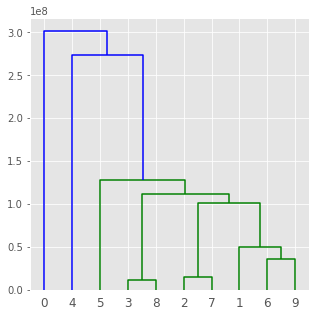

In [34]:
Z=linkage(X, 'single')
dn=dendrogram(Z)
plt.show()

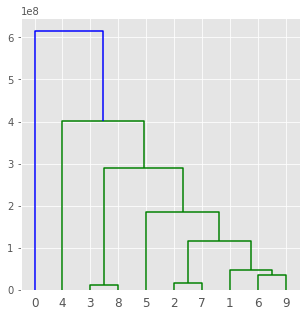

In [35]:
Z=linkage(X, 'median')
dn=dendrogram(Z)
plt.show()

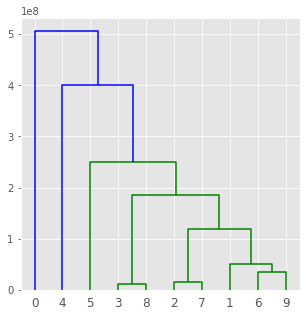

In [36]:
Z=linkage(X, 'average')
dn=dendrogram(Z)
plt.show()

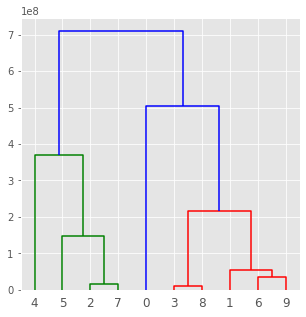

In [42]:
Z=linkage(X, 'ward')
dn=dendrogram(Z)
plt.show()

In [44]:
max_d=(6*10**8)
from scipy.cluster.hierarchy import fcluster
clusters=fcluster(Z,max_d,criterion='distance')

In [45]:
clusters

array([2, 2, 1, 2, 1, 1, 2, 1, 2, 2], dtype=int32)

In [46]:
outcome=pd.DataFrame(X)
outcome['category']=clusters

In [47]:
outcome

,0,1,category
0,237000000,760505847,2
1,300000000,309404152,2
2,245000000,200074175,1
3,250000000,448130642,2
4,49,49,1
5,263700000,73058679,1
6,258000000,336530303,2
7,260000000,200807262,1
8,250000000,458991599,2
9,250000000,301956980,2


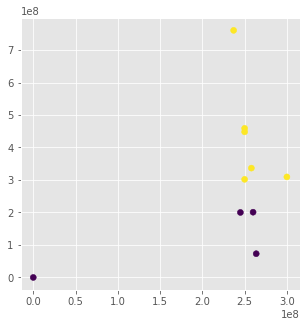

In [51]:
plt.scatter(outcome[0],outcome[1], c=clusters)